# Exercise and Calories Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data Sets

In [2]:
exercise = pd.read_csv("exercise.csv")
calorie = pd.read_csv("calories.csv")
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


<div class = "alert alert-block alert-info"> <b> note :</b> merging the data sets. </div>

In [3]:
df = exercise.assign(Calorie=np.asanyarray(calorie.Calories))
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calorie
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


## Cleaning the Data Set

In [4]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calorie
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calorie     15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
# checking for NaN values
df.count()
# no NaN values

User_ID       15000
Gender        15000
Age           15000
Height        15000
Weight        15000
Duration      15000
Heart_Rate    15000
Body_Temp     15000
Calorie       15000
dtype: int64

## Creating the model

In [7]:
df.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calorie
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calorie,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [8]:
x = df[["Duration", "Heart_Rate", "Body_Temp"]]
y = df.Calorie

In [9]:
x

,Duration,Heart_Rate,Body_Temp
0,29.0,105.0,40.8
1,14.0,94.0,40.3
2,5.0,88.0,38.7
3,13.0,100.0,40.5
4,10.0,81.0,39.8
...,...,...,...
14995,11.0,92.0,40.4
14996,6.0,85.0,39.2
14997,16.0,90.0,40.1
14998,2.0,84.0,38.3


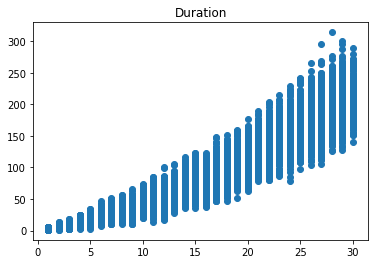

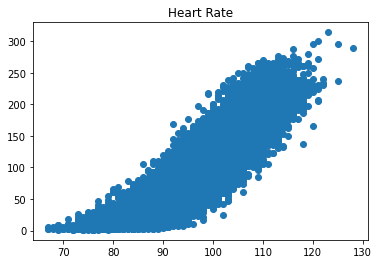

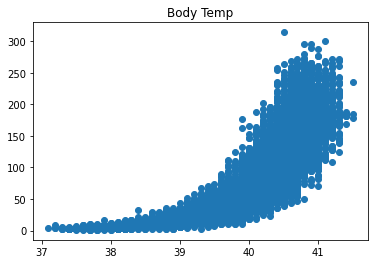

In [10]:
plot1 = plt.figure(1)
plt.scatter(x.Duration, y)
plt.title("Duration")

plot2 = plt.figure(2)
plt.scatter(x.Heart_Rate, y)
plt.title("Heart Rate")

plot3 = plt.figure(3)
plt.scatter(x.Body_Temp, y)
plt.title("Body Temp")

plt.show()

<div class = "alert alert-block alert-info"> <b>note:</b> Body temp is not linear. so we remove it from xs. </div>

In [74]:
x = df[["Duration", "Heart_Rate"]]
y = df.Calorie

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [77]:
from sklearn import linear_model

In [78]:
regr = linear_model.LinearRegression()

x_train = np.asanyarray(x_train)
y_train = np.asanyarray(y_train)

regr.fit(x_train, y_train)

LinearRegression()

In [79]:
print(f"coefs are : {regr.coef_}")
print(f"intercept is : {regr.intercept_}")

coefs are : [5.19699401 1.99728451]
intercept is : -181.99094033927489


In [80]:
def predict(a, b):
    return regr.intercept_ + (regr.coef_[0] * a) + (regr.coef_[1] * b)

In [81]:
a = float(input("enter the a : "))
b = float(input("enter the b : "))
predict(a, b)

enter the a : 29
enter the b : 105


178.43675914478376

## testing the result

In [83]:
x_test = np.asanyarray(x_test)
y_test = np.asanyarray(y_test)
y_pred = regr.predict(x_test)

In [84]:
from sklearn.metrics import r2_score

In [89]:
r2_score(y_test, y_pred)

0.9367527732706202

## another model

In [67]:
x1 = df[["Duration", "Heart_Rate", "Body_Temp"]]
y1 = df.Calorie

In [68]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

In [69]:
regr1 = linear_model.LinearRegression()

x_train1 = np.asanyarray(x_train1)
y_train1 = np.asanyarray(y_train1)

regr1.fit(x_train1, y_train1)

LinearRegression()

In [70]:
def predict1(a, b, c):
    return regr1.intercept_ + (regr1.coef_[0] * a) + (regr1.coef_[1] * b + (regr1.coef_[2] * c))

In [71]:
a = float(input("enter the a : "))
b = float(input("enter the b : "))
c = float(input("enter the c : ")) 
predict1(a, b, c)

enter the a : 29
enter the b : 105
enter the c : 40.8


184.88230131032242

In [72]:
x_test1 = np.asanyarray(x_test1)
y_test1 = np.asanyarray(y_test1)
y_pred1 = regr1.predict(x_test1)

In [73]:
r2_score(y_test1, y_pred1)

0.946537700779544